In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from keras.datasets import cifar100

In [4]:
from keras.utils import to_categorical

In [5]:
(train_X, train_Y_), (test_X, test_Y_) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [6]:
train_Y = to_categorical(train_Y_)
test_Y = to_categorical(test_Y_)

In [7]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/ 255

In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import  Conv2D, Dense, BatchNormalization, Flatten, MaxPool2D, Input, Dropout

In [10]:
def create_VGG16_Network():
  model = Sequential()
  model.add(Input(shape = (32,32,3)))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 32, kernel_size=(3,3),activation='relu', padding= 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Dropout(rate = 0.2))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(Dropout(rate = 0.2))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(units = 256,activation='relu', bias_regularizer='l2'))
  model.add(Dropout(rate = 0.2))
  model.add(Dense(units = 100, activation = 'softmax'))
  return model

In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
path = F'/content/gdrive/My Drive/Weights/VGG16_SGD_Dropout.h5'

In [14]:
model = create_VGG16_Network()

In [ ]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose = 1, patience= 20, min_delta=0.001)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=path, monitor = 'val_accuracy',save_best_only=True, save_weights_only=True, mode = 'max')
model.compile(optimizer= 'sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          1

In [ ]:
history = model.fit(x = train_X, y = train_Y, batch_size= 32, epochs = 200, validation_split= 0.1, callbacks=[model_checkpoint, earlyStopping])

Epoch 1/200
1407/1407 [==============================] - 12s 9ms/step - loss: 4.6053 - accuracy: 0.0087 - val_loss: 4.6056 - val_accuracy: 0.0074
Epoch 2/200
1407/1407 [==============================] - 12s 9ms/step - loss: 4.6053 - accuracy: 0.0093 - val_loss: 4.6059 - val_accuracy: 0.0074
Epoch 3/200
1407/1407 [==============================] - 11s 8ms/step - loss: 4.6053 - accuracy: 0.0097 - val_loss: 4.6061 - val_accuracy: 0.0074
Epoch 4/200
1407/1407 [==============================] - 11s 8ms/step - loss: 4.6052 - accuracy: 0.0098 - val_loss: 4.6064 - val_accuracy: 0.0074
Epoch 5/200
1407/1407 [==============================] - 11s 8ms/step - loss: 4.6052 - accuracy: 0.0099 - val_loss: 4.6064 - val_accuracy: 0.0060
Epoch 6/200
1407/1407 [==============================] - 11s 8ms/step - loss: 4.6052 - accuracy: 0.0100 - val_loss: 4.6065 - val_accuracy: 0.0078
Epoch 7/200
1407/1407 [==============================] - 12s 8ms/step - loss: 4.6051 - accuracy: 0.0096 - val_loss: 4.6066 -

In [15]:
model.load_weights('/content/gdrive/My Drive/Weights/VGG16_SGD_Dropout.h5')

In [16]:
y_pred = model.predict(test_X)

In [17]:
y_true = test_Y.argmax(-1)

In [18]:
y_pred = y_pred.argmax(-1)

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [20]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [21]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [22]:
print('Precision:', prec)

Precision: 0.3336877489869421


In [23]:
print('Recall', recall)

Recall 0.3121


In [24]:
print('Accuracy', accuracy)

Accuracy 0.3121


In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,53,1,2,0,0,1,0,0,0,0,3,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,11,0,0,0,0,0,0,0,0,6,0,0,0,2,0,0,0
1,1,37,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,6,1,0,0,0,0,0,0
2,0,0,34,2,1,3,1,2,0,0,3,21,0,0,2,0,1,0,0,0,2,0,5,0,1,4,0,0,2,0,0,1,1,0,0,21,8,0,2,1,2,0,0,1,1,1,12,0,0,0,0,1,0,1,3,0,0,1,0,0,0,2,2,1,0,1,2,0,0,0,2,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,12,1
3,0,1,0,11,6,0,1,2,1,0,0,1,0,0,0,5,1,0,1,9,0,20,0,0,1,0,0,2,0,2,0,12,3,0,1,0,0,1,3,0,0,0,0,3,0,1,2,1,0,1,2,1,0,0,0,3,4,0,0,0,0,0,0,9,2,2,5,1,0,1,0,0,6,0,4,0,0,1,0,1,2,0,0,0,0,0,1,0,3,1,1,0,0,2,0,0,0,2,0,0
4,0,0,0,10,12,1,1,0,0,1,0,0,0,0,2,3,1,0,1,1,0,1,0,0,0,1,2,4,0,3,1,1,0,0,0,2,0,3,3,0,0,1,3,6,2,1,0,0,0,0,5,2,0,0,0,9,0,1,0,0,0,0,0,8,5,0,3,1,0,0,0,0,4,0,7,2,0,2,4,2,3,0,1,0,1,1,1,0,1,1,0,0,0,7,0,1,0,0,0,1
5,0,0,2,0,0,20,0,0,2,1,3,1,1,0,0,0,3,0,1,0,5,0,0,0,0,9,0,1,0,1,1,0,0,0,0,1,0,2,0,1,4,0,0,0,2,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,3,6,0,1,0,0,0,0,1,1,0,0,1,0
6,0,0,0,1,1,0,26,3,0,0,1,0,0,0,5,0,0,0,3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,2,0,0,1,3,0,0,0,0,1,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,3,4,2,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,1,0,1,31,1,2,2,1,0,0,4,1,0,0,5,1,0,2,1,0,7,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,2,1,1,0,0,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,4,3,0,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,2
8,0,2,0,1,0,0,0,0,27,2,0,1,0,0,1,1,2,1,0,6,0,1,2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,2,1,1,0,6,0,1,3,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,3,0,0,0,0,0,3,2,0,0,0,0,1,0,1,0,1,2,1,0,1,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


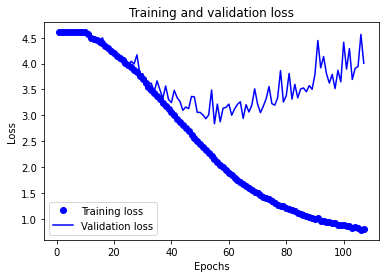

In [ ]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()